## 1_ 수집한 데이터 불러오기

* 수집한 데이터를 읽어와 인공 신경망에서 사용할 수 있는 텐서로 변경
* 텐서란? 3차원 이상의 행렬을 의미 

In [2]:
from tensorflow.keras.preprocessing import image as keras_image
import os
import numpy as np
from tqdm import tqdm
from PIL import ImageFile
import pandas as pd

In [3]:
dirname = "img"

def image_to_tensor(img_path):
    img = keras_image.load_img(os.path.join(dirname, img_path),target_size=(120,160))
    x = keras_image.img_to_array(img)
    
    return np.expand_dims(x, axis=0)

def data_to_tensor(img_paths):
    list_of_tensors = [image_to_tensor(img_path) for img_path in tqdm(img_paths)]
    
    return np.vstack(list_of_tensors)

In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
# Load the data
data = pd.read_csv(os.path.join(dirname, "0_road_labels.csv"))
data = data.sample(frac=1)

In [5]:
files = data['file']
targets = data['label'].values

tensors = data_to_tensor(files)

print(data.tail())
print(tensors.shape)
print(targets.shape)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 313.56it/s]

                   file  label labelNames
2     img_1\cropped.png      0      img_1
0           img_1\a.png      0      img_1
1     img_1\cropped.jpg      0      img_1
3     img_2\a_ gray.png      1      img_2
4  img_2\savedImage.jpg      1      img_2
(5, 120, 160, 3)
(5,)


## 2_ 수집한 이미지 출력해 보기

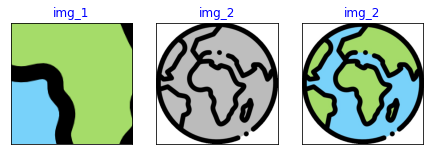

In [8]:
import cv2
import matplotlib.pyplot as plt

# Name list
names = ['img_1', 'img_2']

def display_images(img_path, ax):
    img = cv2.imread(os.path.join(dirname, img_path))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

fig = plt.figure(figsize=(10, 3))

for i in range(3):
    ax = fig.add_subplot(1, 4, i + 1, xticks=[], yticks=[])
    ax.set_title(names[targets[i+2]], color='blue')
    display_images(files[i+2], ax)
plt.show()